# Task 1 : Prediction using Supervised Machine Learning

## GRIP @SPARKS FOUNDATION : Data Science& Business Analytics #Task1 

### Author: Pallavee Bisoyee
In this task we are going to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
### Technical Stack : Numpy Array, Pandas, Matplotlib




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import pickle

In [2]:
# importing data from dataset
data = pd.read_csv('http://bit.ly/w-data')
print('data imported successfully')
data.head(10)

data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:**

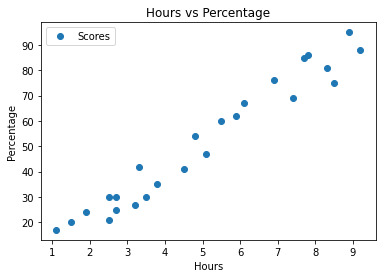

In [5]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours')  
plt.ylabel('Percentage')  
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

The relation Matrix


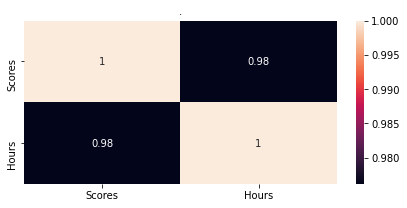

In [6]:
# Here the heatmap shows positive correlation between the Hours column and Scores column.
plt.figure(figsize=(7,3))
sns.heatmap(data[['Scores','Hours']].corr(), annot = True)
plt.title('.', fontsize = 10)
print('The relation Matrix')
plt.show()

<AxesSubplot:xlabel='Hours'>

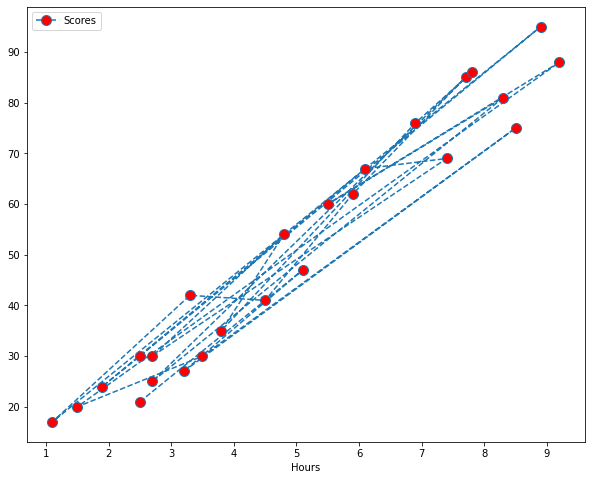

In [7]:
data.plot("Hours","Scores",linestyle = "--",marker = "o",markersize = "10",markerfacecolor = "red", figsize=(10,8))

### Preparing the data

*The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).*

In [8]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [9]:
#defining training and testing sets ## we'll let the test size be equal to 0.1
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.1)

In [10]:
best = 0
for _ in range(15):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2)

    linear = linear_model.LinearRegression()
    linear.fit(x_train, y_train) # fit this data  to get best fit line...
    acc = linear.score(x_test, y_test) # this will gona return the accuracy value of  out model
    #print("Accuracy: ",acc) #Change in Every Run best of data size, every time different data will be used...

    if acc > best:
        best = acc
        with open("student_model.pickle", "wb") as f: #opening student_model.pickle in write-binary mode as f to write
            pickle.dump(linear, f) #pickle saving the object into file
print(" Best Accuracy: ",best)

 Best Accuracy:  0.9714040146346733


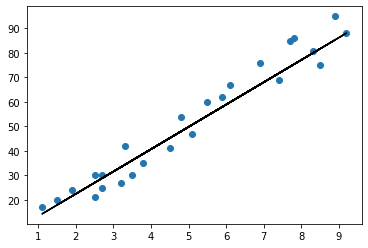

In [11]:
# Plotting the regression line
line = linear.coef_*x+linear.intercept_

# Plotting for the test data
plt.scatter (x,y)
plt.plot (x, line, color = 'Black')
plt.show()


In [12]:
pickle_in = open("student_model.pickle", "rb") #opening student_model.pickle in read-binary mode to read
linear = pickle.load(pickle_in) #loading model in variable(linear)
prediction = linear.predict(x_test)
print(x_test,prediction)

[[2.7]
 [8.9]
 [7.8]
 [7.7]
 [6.1]] [29.21310871 89.58926033 78.87736246 77.90355357 62.32261121]


### Making Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [13]:
# Comparing Actual vs Predicted
data = pd.DataFrame({'Actual': y_test, 'Predicted': prediction})

In [14]:
data

,Actual,Predicted
0,30,29.213109
1,95,89.589260
2,86,78.877362
3,85,77.903554
4,67,62.322611


In [15]:
# Estimating the Training Data and Test Data Score
print("Training score:", linear.score(x_train, y_train))
print("Testing score:", linear.score(x_test, y_test))

Training score: 0.9421948105935886
Testing score: 0.9429864295953662


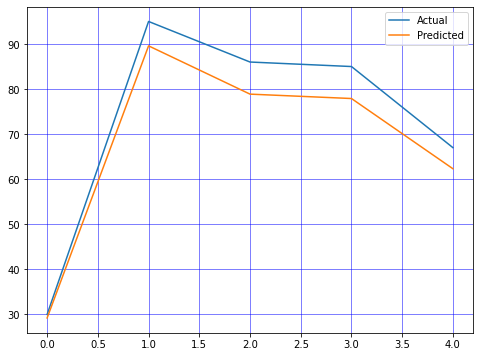

In [16]:
# Ploting the line graph to depict the diffrence between the actual and predicted value.
data.plot(kind='line', figsize=(8,6))
plt.grid(which='major', linewidth='0.5', color = 'black')
plt.grid(which='major', linewidth='0.5', color = 'blue')
plt.show()

In [17]:
# Testing your own data.
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = linear.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 92.99759147143985


## Evaluating the model
*The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.*

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
print('Root mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

Mean Absolute Error: 5.018820742300603
Mean Squared Error: 30.57295699378086
Root mean squared Error: 5.529281779198891
